<a href="https://colab.research.google.com/github/SUYAMBULAKSHMI-VENKATESAN/DAMAKA/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Segregate Iris using Canny Edge & Hough Transform**

+-------------------+-----------------------+-------------------+-------------------+--------+-----------+
| Technique         | Preprocessing Param   | Threshold Value   | Adaptive Params   |   Mean |   Std Dev |
+===================+=======================+===================+===================+========+===========+
| Blurred Image     | (5, 5)                | -                 | -                 |  98.23 |     29.66 |
+-------------------+-----------------------+-------------------+-------------------+--------+-----------+
| Otsu Thresholding | (5, 5)                | 92.00             | -                 | 158.6  |    123.65 |
+-------------------+-----------------------+-------------------+-------------------+--------+-----------+
| Adaptive Mean     | (5, 5)                | -                 | BlockSize=11, C=2 | 205.28 |    101.03 |
+-------------------+-----------------------+-------------------+-------------------+--------+-----------+
| Adaptive Gaussian | (5, 5)         

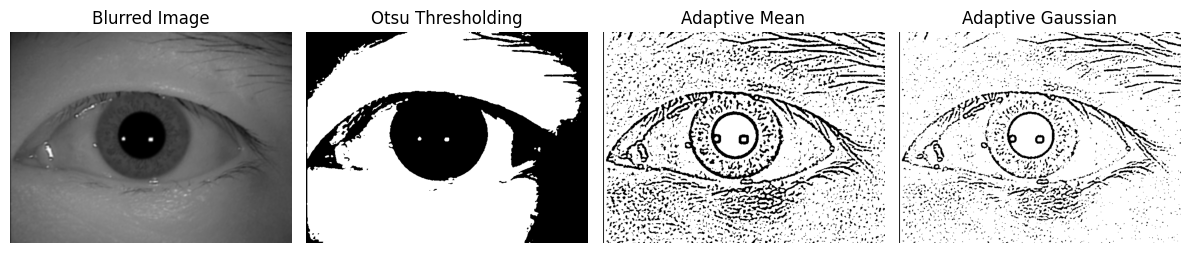

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tabulate import tabulate

def apply_thresholding(image_path):
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    # Common preprocessing parameter
    blur_kernel_size = (5, 5)
    blurred_image = cv2.GaussianBlur(image, blur_kernel_size, 0)

    # Original statistics
    original_mean = float(np.mean(blurred_image))
    original_std = float(np.std(blurred_image))

    # --- Global Thresholding (Otsu's Method) ---
    otsu_threshold_value, otsu_thresh = cv2.threshold(
        blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
    )

    # Parameters specific to adaptive thresholding
    adaptive_block_size = 11  # Must be odd
    adaptive_C = 2

    # --- Adaptive Mean Thresholding ---
    adaptive_mean_thresh = cv2.adaptiveThreshold(
        blurred_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY, adaptive_block_size, adaptive_C
    )

    # --- Adaptive Gaussian Thresholding ---
    adaptive_gauss_thresh = cv2.adaptiveThreshold(
        blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, adaptive_block_size, adaptive_C
    )

    # Prepare table data
    table_data = [
        ["Blurred Image", str(blur_kernel_size), "-", "-", f"{original_mean:.2f}", f"{original_std:.2f}"],
        ["Otsu Thresholding", str(blur_kernel_size), f"{otsu_threshold_value:.2f}", "-", f"{np.mean(otsu_thresh):.2f}", f"{np.std(otsu_thresh):.2f}"],
        ["Adaptive Mean", str(blur_kernel_size), "-", f"BlockSize={adaptive_block_size}, C={adaptive_C}", f"{np.mean(adaptive_mean_thresh):.2f}", f"{np.std(adaptive_mean_thresh):.2f}"],
        ["Adaptive Gaussian", str(blur_kernel_size), "-", f"BlockSize={adaptive_block_size}, C={adaptive_C}", f"{np.mean(adaptive_gauss_thresh):.2f}", f"{np.std(adaptive_gauss_thresh):.2f}"],
    ]

    headers = ["Technique", "Preprocessing Param", "Threshold Value", "Adaptive Params", "Mean", "Std Dev"]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

    # Display results
    titles = ["Blurred Image", "Otsu Thresholding", "Adaptive Mean", "Adaptive Gaussian"]
    images = [blurred_image, otsu_thresh, adaptive_mean_thresh, adaptive_gauss_thresh]

    plt.figure(figsize=(12, 6))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    return table_data

# Example usage:
result = apply_thresholding("/content/S6000S00.jpg")